In [3]:
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt, operator as op
import glob
from pathlib import Path
import seaborn as sns
from collections import defaultdict
import pandas as pd


In [5]:
base_path = Path("/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/")
outputs = Path("/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/outputs/outputs_protocolpaper2024/")
conditions = ["repoUASdrprRNAi","repoUASLexARNAi"] ## List of experimental groups being compared (Folder names must start with items in this list)
meshfiles = dict()
for condition in conditions:
    inputs = glob.glob(str(base_path.joinpath(condition))+"*")
    meshfiles[condition] = inputs

print(meshfiles)

{'repoUASdrprRNAi': ['/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_5', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_2', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_11.17_20231122_1', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_3', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_4', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_vol

In [6]:
#%%capture --no-display
vacuole_metrics = defaultdict(dict)

for condition in meshfiles.keys():
    for brain in meshfiles[condition]: 
        whole_brain = mesh.Mesh.from_file(glob.glob(str(brain)+"/wholebrain/*.stl")[0])
        vacuoles = glob.glob(str(brain)+"/vacuoles/*.stl")
        
        whole_brain_volume =  whole_brain.get_mass_properties()[0]
        
        vacuole_volumes = list()
        for meshfile in vacuoles:
            vacuole = mesh.Mesh.from_file(meshfile)
            volume, cog, inertia = vacuole.get_mass_properties()
            vacuole_volumes.append(volume)
        
        percent_vacuole_volume_per_brain = 100*sum(vacuole_volumes)/whole_brain_volume
        vacuole_metrics[brain.split("/")[-1]] = {"condition": condition,
                                                 "num_vacuoles":len(vacuole_volumes),
                                                 "percent_vacuole_volume": percent_vacuole_volume_per_brain,
                                                 "vacuole_volumes": vacuole_volumes,
                                                 "vacuole_volumes_brain_normalized": vacuole_volumes/whole_brain_volume,
                                                 "whole_brain_volume": whole_brain_volume
                                                }
        
        


Your mesh is not closed, the mass methods will not function
        correctly on this mesh.  For more info:
        https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
        correctly on this mesh.  For more info:
        https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
        correctly on this mesh.  For more info:
        https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
        correctly on this mesh.  For more info:
        https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
        correctly on this mesh.  For more info:
        https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
        correctly on this mesh.  For more info:
        https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass 

In [7]:
#print(vacuole_metrics)
vacuole_metrics_df = pd.DataFrame.from_dict(vacuole_metrics)
vacuole_metrics_df_t = vacuole_metrics_df.transpose()
vacuole_metrics_df_t['sample'] = vacuole_metrics_df_t.index
vacuole_metrics_df_t

,condition,num_vacuoles,percent_vacuole_volume,vacuole_volumes,vacuole_volumes_brain_normalized,whole_brain_volume,sample
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_5,repoUASdrprRNAi,29,6.090615,"[2654500803925.3335, 1751082773162.6667, 75680...","[0.0008693463841291782, 0.0005734778738468515,...",3053444348979882.5,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_2,repoUASdrprRNAi,14,1.159733,"[311292264448.0, 334007085738.6667, 1276142671...","[2.973472851358766e-05, 3.190445491366485e-05,...",10468979540396714.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_11.17_20231122_1,repoUASdrprRNAi,7,0.060216,"[525016530944.0, 785198874624.0, 835274451626....","[6.112343917114414e-05, 9.141437044665191e-05,...",8589446831909547.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_3,repoUASdrprRNAi,14,0.431156,"[904966559061.3334, 1270980553386.6667, 194209...","[8.158187561709225e-05, 0.00011457768950676407...",11092740295759190.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_4,repoUASdrprRNAi,18,2.60486,"[1087199838208.0, 1562656811690.6667, 19313018...","[8.899513394786988e-05, 0.0001279147102341234,...",12216396447527594.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_male40D_Phalloidin_DAPI_11.17_20231122_1,repoUASdrprRNAi,28,4.417455,"[1159987833514.6667, 695374206293.3334, 470293...","[0.00012559037282791207, 7.528726017641371e-05...",9236279878746112.0,repoUASdrprRNAi_SH_male40D_Phalloidin_DAPI_11....
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_1,repoUASdrprRNAi,27,1.746,"[1171861689685.3333, 835275281749.3334, 115007...","[9.918885156472752e-05, 7.06994662137708e-05, ...",11814449620082688.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_6,repoUASdrprRNAi,38,4.008199,"[1468184319317.3333, 450160317781.3333, 370143...","[0.00013466259531070928, 4.128892803222047e-05...",10902688426060458.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_11.17_20231122_2,repoUASdrprRNAi,44,1.549352,"[101869965279232.0, 919422260565.3334, 2599778...","[0.010537398245247132, 9.510475917573942e-05, ...",9667468468811094.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_7,repoUASLexARNAi,0,0.0,[],[],8819930977031509.0,repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_...


/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/1629197140.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/1629197140.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45,
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/1629197140.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


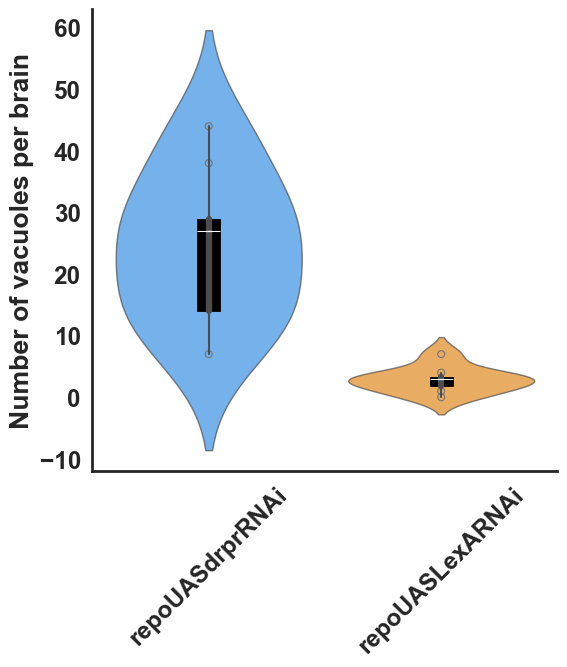

In [32]:
color_scheme = {"repoUASdrprRNAi": "dodgerblue","repoUASLexARNAi":"darkorange" }
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

fig, ax = plt.subplots(figsize=(6, 6))

sns.violinplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
              x= vacuole_metrics_df_t["condition"], ax=ax, palette=color_scheme, alpha=0.7)

sns.boxenplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
             x= vacuole_metrics_df_t["condition"], color="black", width=0.1, ax = ax, legend=False,
             line_kws={"color":"white"})

sns.despine(right = True)
ax.set_xticklabels(conditions, rotation=45,                       
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("Number of vacuoles per brain",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig(outputs.joinpath("num_vacuoles_violin.pdf"), bbox_inches='tight') 

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/2721197994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/2721197994.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45,
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/2721197994.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


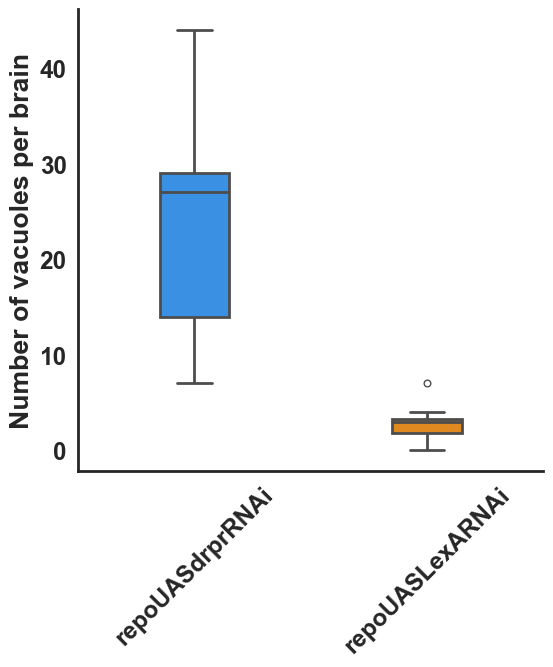

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
               x= vacuole_metrics_df_t["condition"],  
               palette = color_scheme, linewidth = 2,  ax = ax, width=0.3
          )

sns.despine(right = True)
ax.set_xticklabels(conditions, rotation=45,
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("Number of vacuoles per brain",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig(outputs.joinpath("num_vacuoles_box.pdf"), bbox_inches='tight') 

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/3877582198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y= vacuole_metrics_df_t["percent_vacuole_volume"].astype(float),
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/3877582198.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45,
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/3877582198.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


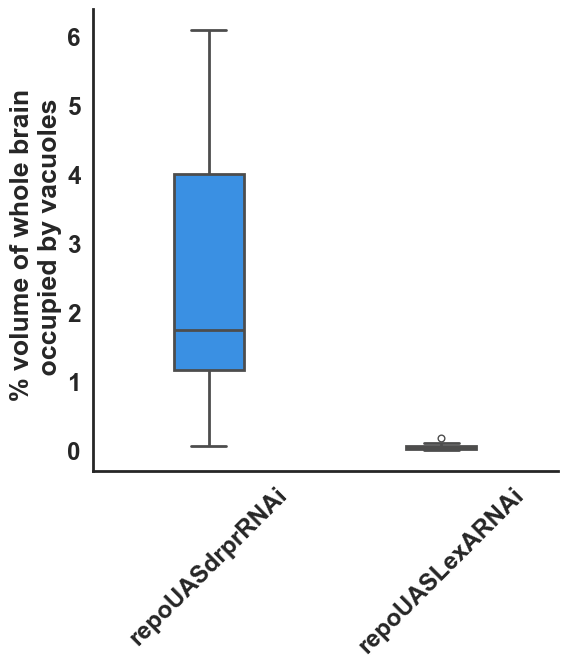

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(y= vacuole_metrics_df_t["percent_vacuole_volume"].astype(float),
               x= vacuole_metrics_df_t["condition"], linewidth = 2,
               palette = color_scheme, ax = ax, width=0.3
          )

sns.despine(right = True)
ax.set_xticklabels(conditions, rotation=45,
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("% volume of whole brain \n occupied by vacuoles",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig(outputs.joinpath("percent_vacuoles_box.pdf"), bbox_inches='tight') 



/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/3366359703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y= vacuole_metrics_df_t["percent_vacuole_volume"].astype(float),
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/3366359703.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45,
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_17589/3366359703.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


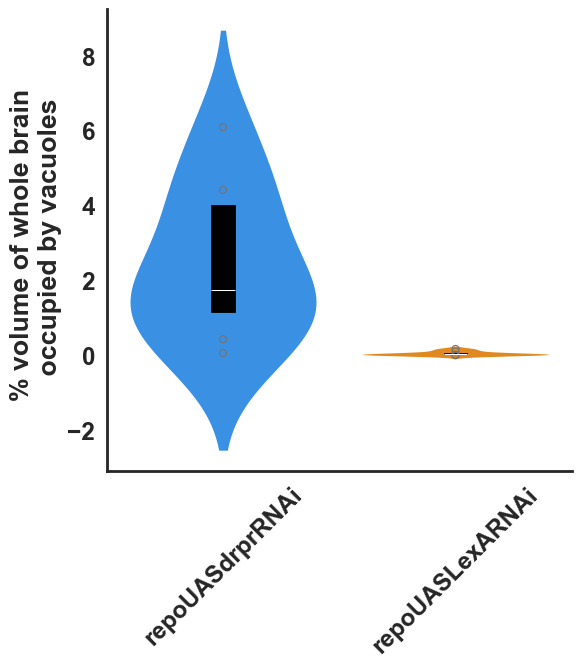

In [38]:
fig, ax = plt.subplots(figsize=(6,6))
sns.violinplot(y= vacuole_metrics_df_t["percent_vacuole_volume"].astype(float),
               x= vacuole_metrics_df_t["condition"],  inner=None,
               palette = color_scheme, linewidth = 0, ax = ax
          )

sns.boxenplot(y= vacuole_metrics_df_t["percent_vacuole_volume"].astype(float),
               x= vacuole_metrics_df_t["condition"], color="black", width=0.1, ax = ax, 
             line_kws={"color":"white"})
sns.despine(right = True)
ax.set_xticklabels(conditions, rotation=45,
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("% volume of whole brain \n occupied by vacuoles",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig(outputs.joinpath("percent_vacuoles_violin.pdf"), bbox_inches='tight') 

/Users/sbandya/miniconda3/envs/hemocyte_analysis/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sbandya/miniconda3/envs/hemocyte_analysis/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


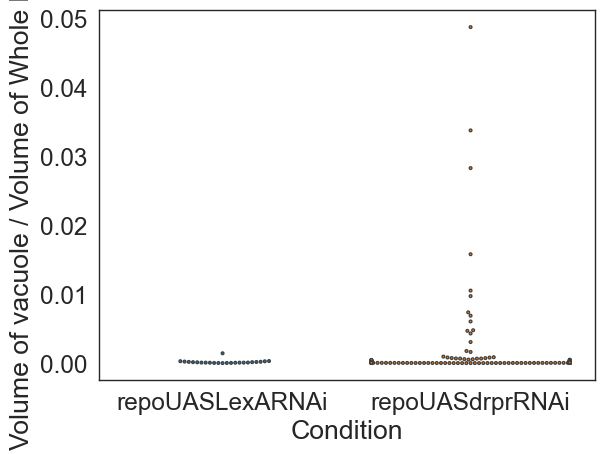

<Figure size 640x480 with 0 Axes>

In [39]:
vacuoles_per_condition = defaultdict(list)
for brain in vacuole_metrics.values():
    vacuoles_per_condition[brain["condition"]].append(brain["vacuole_volumes_brain_normalized"])
    
vacuoles_per_condition_unlisted = defaultdict(list)
for volumes in vacuoles_per_condition.keys():
    flat_list = [item for sublist in vacuoles_per_condition[volumes] for item in sublist]
    vacuoles_per_condition_unlisted[volumes] = flat_list

sorted_keys, sorted_vals = zip(*sorted(vacuoles_per_condition_unlisted.items(), key=op.itemgetter(1)))


sns.swarmplot(data=sorted_vals, size=2, linewidth=.9)

plt.xticks(plt.xticks()[0], sorted_keys)
plt.xlabel("Condition")
plt.ylabel("Volume of vacuole / Volume of Whole brain")
plt.show()

sns.despine(right = True)



In [40]:
vacuole_metrics_df_t_conditionindex = vacuole_metrics_df_t[["condition","num_vacuoles"]].set_index("condition")
vacuole_metrics_df_t_conditionindex

,num_vacuoles
condition,
repoUASdrprRNAi,29
repoUASdrprRNAi,14
repoUASdrprRNAi,7
repoUASdrprRNAi,14
repoUASdrprRNAi,18
repoUASdrprRNAi,28
repoUASdrprRNAi,27
repoUASdrprRNAi,38
repoUASdrprRNAi,44


In [41]:
repo_drpr = vacuole_metrics_df_t_conditionindex["num_vacuoles"].loc["repoUASdrprRNAi"].to_list()
repo_lexA = vacuole_metrics_df_t_conditionindex["num_vacuoles"].loc["repoUASLexARNAi"].to_list()


In [42]:
from scipy import stats 
import numpy as np
print(np.median(repo_drpr),np.median(repo_lexA))
print("mean number of vacuoles in repo>drprRNAi: ",np.mean(repo_drpr))
print("mean number of vacuoles in repo>LexARNAi: ",np.mean(repo_lexA))
print("difference in means :",np.mean(repo_drpr)-np.mean(repo_lexA))
stats.ttest_ind(repo_drpr,repo_lexA,alternative="greater")

27.0 3.0
mean number of vacuoles in repo>drprRNAi:  24.333333333333332
mean number of vacuoles in repo>LexARNAi:  2.875
difference in means : 21.458333333333332


TtestResult(statistic=4.935538028697458, pvalue=8.974217949973156e-05, df=15.0)

In [43]:
vacuole_metrics_df_t_conditionindex_percentvacuole = vacuole_metrics_df_t[["condition","percent_vacuole_volume"]].set_index("condition")
repo_drpr = vacuole_metrics_df_t_conditionindex_percentvacuole["percent_vacuole_volume"].loc["repoUASdrprRNAi"].to_list()
repo_lexA = vacuole_metrics_df_t_conditionindex_percentvacuole["percent_vacuole_volume"].loc["repoUASLexARNAi"].to_list()
print("mean %vacuole volume in repo>drprRNAi: ",np.mean(repo_drpr))
print("mean %vacuole volume in repo>drprRNAi,relishRNAi: ",np.mean(repo_lexA))
print("difference in means :",np.mean(repo_drpr)-np.mean(repo_lexA))
stats.ttest_ind(repo_drpr,repo_lexA)

stats.ttest_ind(repo_drpr,repo_lexA,alternative="greater")



mean %vacuole volume in repo>drprRNAi:  2.4519540055204705
mean %vacuole volume in repo>drprRNAi,relishRNAi:  0.053593887133034854
difference in means : 2.3983601183874357


TtestResult(statistic=3.360537410837306, pvalue=0.00214578090157498, df=15.0)

In [45]:
# Distribution of vacuole volumes 

vacuole_metrics_df_t[:5]

,condition,num_vacuoles,percent_vacuole_volume,vacuole_volumes,vacuole_volumes_brain_normalized,whole_brain_volume,sample
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_5,repoUASdrprRNAi,29,6.090615,"[2654500803925.3335, 1751082773162.6667, 75680...","[0.0008693463841291782, 0.0005734778738468515,...",3053444348979882.5,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_2,repoUASdrprRNAi,14,1.159733,"[311292264448.0, 334007085738.6667, 1276142671...","[2.973472851358766e-05, 3.190445491366485e-05,...",10468979540396714.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_11.17_20231122_1,repoUASdrprRNAi,7,0.060216,"[525016530944.0, 785198874624.0, 835274451626....","[6.112343917114414e-05, 9.141437044665191e-05,...",8589446831909547.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_3,repoUASdrprRNAi,14,0.431156,"[904966559061.3334, 1270980553386.6667, 194209...","[8.158187561709225e-05, 0.00011457768950676407...",11092740295759190.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_12.9_20231220_4,repoUASdrprRNAi,18,2.60486,"[1087199838208.0, 1562656811690.6667, 19313018...","[8.899513394786988e-05, 0.0001279147102341234,...",12216396447527594.0,repoUASdrprRNAi_SH_female40D_Phalloidin_DAPI_1...
